## Importing libraries & getting data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./dataset/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Data

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [7]:
clean_data = data.drop(columns_to_drop , axis=1)

In [8]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
clean_data["Sex"] = le.fit_transform(clean_data["Sex"])
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


## Handling missing values

<AxesSubplot:>

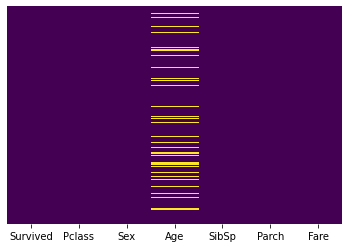

In [12]:
sns.heatmap(clean_data.isnull(), yticklabels=False, cmap="viridis", cbar=False)

<AxesSubplot:>

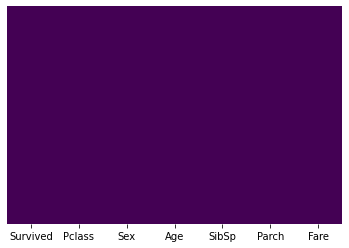

In [13]:
# age has only 714 entries instead of 891 i.e it consists of missing values

clean_data= clean_data.fillna(clean_data['Age'].mean())
sns.heatmap(clean_data.isnull(), yticklabels=False, cmap="viridis", cbar=False)

## Selecting Features

In [14]:
input_cols = [ 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare']
output_cols = ['Survived']

X = clean_data[input_cols]
y = clean_data[output_cols]

In [15]:
X.shape , y.shape

((891, 6), (891, 1))

## Entropy

In [16]:
def entropy(col):
    data, counts = np.unique(col, return_counts=True)
    total = float(col.shape[0])

    entropy = 0.0

    for count in counts:
        prob = count / total
        entropy += prob * np.log2(prob)

    return -entropy


In [17]:
col = np.array([4, 4, 4, 3, 3, 32, 3, 4, 1])


In [18]:
entropy(col)

1.7527152789797047

## Information Gain

### --> Note: We are making a Binary Tree, hence split node into 2.

### --> CONDITION : if a person will buy ps5 or not. Lets say split this across salaries, then fkey = Salaries.

### --> say you want to split like : salary < 10 lac (left child) & sal > 10 lac (right child) ,then fval = 10

In [19]:
def divide_data(x_data, key, f_val):
    right_child = pd.DataFrame([], columns=x_data.columns)
    left_child = pd.DataFrame([], columns=x_data.columns)

    for xi in range(x_data.shape[0]):
        val = x_data[key].iloc[xi]

        if val > f_val:
            right_child = right_child.append(x_data.loc[xi])
        else:
            left_child = left_child.append(x_data.loc[xi])

    return left_child, right_child


In [20]:
def info_gain(x_data, key, f_val):
    left, right = divide_data(x_data, key, f_val)

    # now percentage of examples in left and right
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]

    hs = entropy(x_data.Survived)

    information_gain = hs - \
        (l * entropy(left.Survived) + r * entropy(right.Survived))

    return information_gain


In [21]:
#     for feature in X.columns:
#     print(feature)
#     print(info_gain(clean_data , feature , clean_data[feature].mean()))


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<IPython.core.display.Javascript object>

## Decision Tree using Sklearn

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [24]:
tree = DecisionTreeClassifier(criterion='entropy' , max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
tree.predict(X_test[:10])

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [26]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [27]:
tree.score(X_test , y_test)

0.8101694915254237

## Custom Implementation of DT

In [28]:
class CustomDecisionTree:
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.key = None
        self.f_val = None
        self.max_depth = max_depth 
        self.depth = depth
        self.target = None

    def fit(self , X_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []

        # calculating info_gain for each feature
        for ix in features:
            i_gain  = info_gain(X_train , ix , X_train[ix].mean())
            info_gains.append(i_gain)
        
        # selecting the feature with max info_gain 
        self.key = features[np.argmax(info_gains)]
        self.f_val = X_train[self.key].mean()
        # print(self.fkey)

        # Creating the Tree & splitting the data
        data_left , data_right = divide_data(X_train , self.key , self.f_val)

        # reset the index again from starting ,for each subpart
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)

        # Base Case 1 --> reached leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5 :
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 

        # Base Case 2 --> stop early when the depth >= max depth
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return

        # calling recursion
        self.left = CustomDecisionTree(depth=self.depth + 1)
        self.left.fit(data_left)

        self.right = CustomDecisionTree(depth=self.depth + 1)
        self.right.fit(data_right)


    def predict(self , test):
        if test[self.key] > self.f_val:
            # go to right subtree
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # go to left subtree
            if self.left is None:
                return self.target
            return self.left.predict(test)



In [29]:
dt = CustomDecisionTree()

In [30]:
# creating our own train-test split

split = int(0.7*clean_data.shape[0])
train_data = clean_data[:split]
test_data = clean_data[split:]
test_data = test_data.reset_index(drop=True)


In [31]:
dt.fit(train_data)

In [32]:
y_predict = []
for i in range(test_data.shape[0]):
    y_predict.append(dt.predict(test_data.loc[i]))


In [33]:
y_actual = test_data[output_cols]

In [34]:
y_predict[:10]

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead']

In [35]:
y_actual[:10]

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,1


In [36]:
data[split:][:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C


## Visualizing Decision Tree

In [37]:
import pydotplus 
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import graphviz

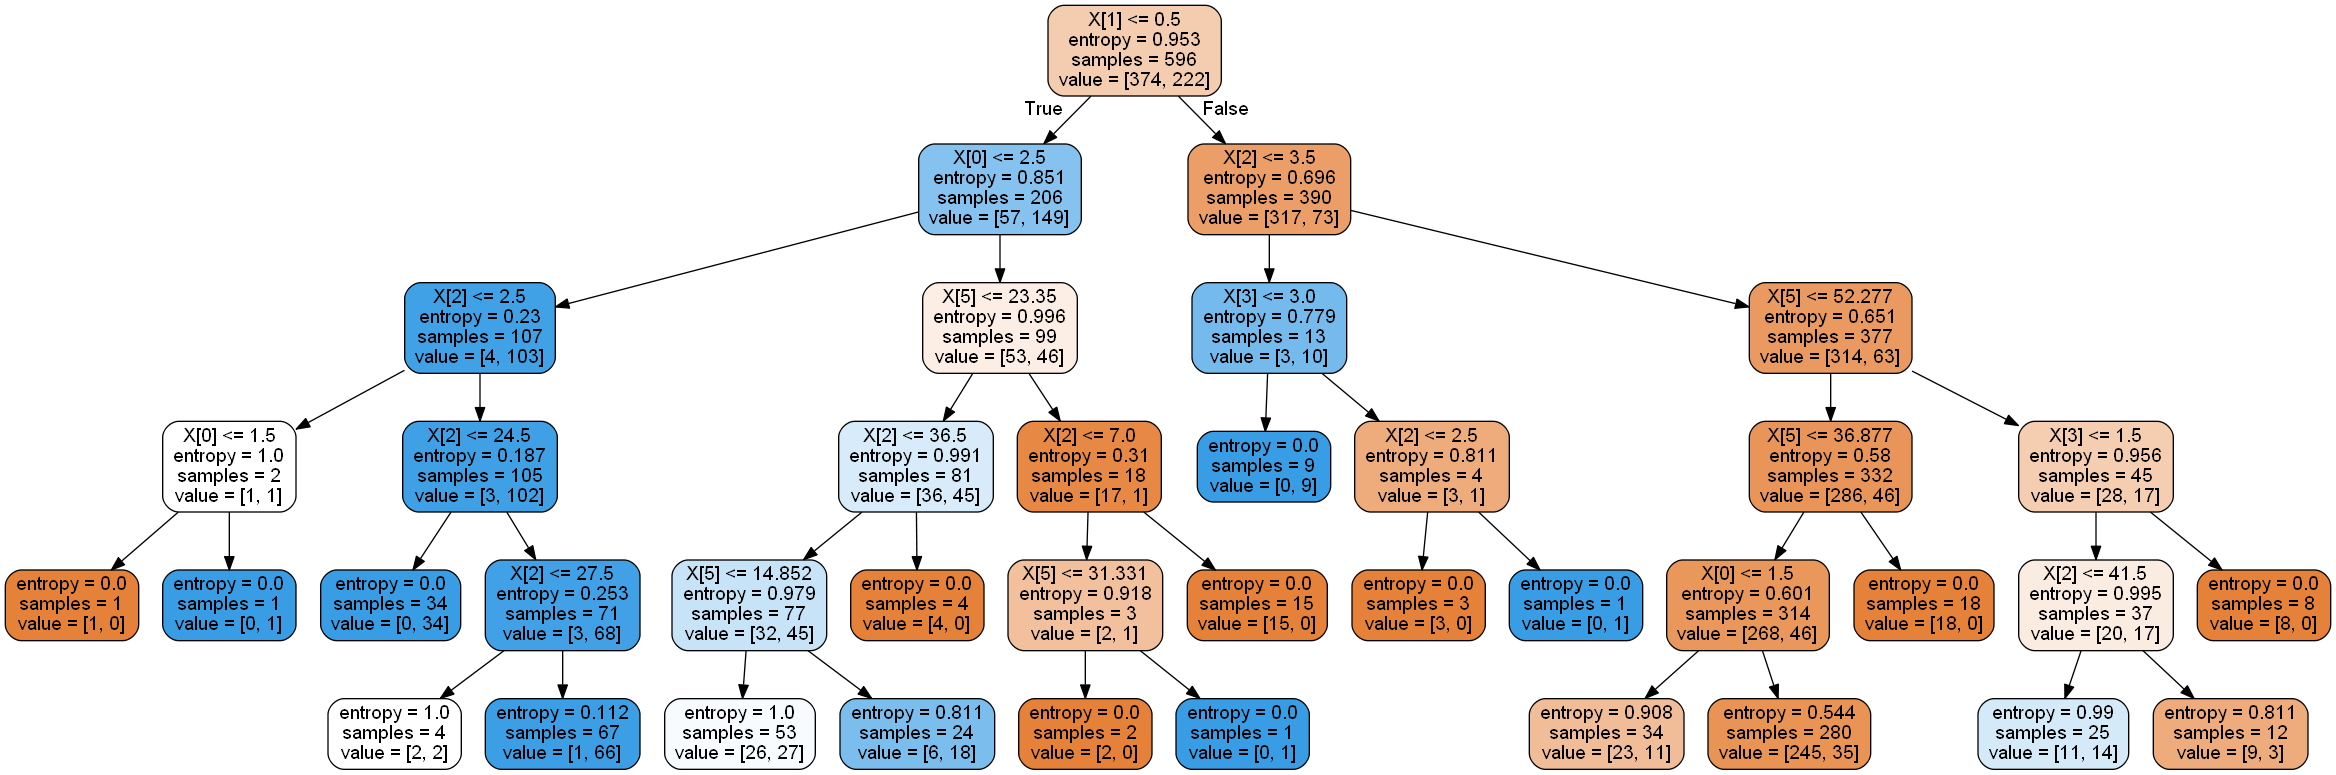

In [38]:
dot_data = StringIO() 
export_graphviz(tree ,out_file=dot_data ,filled=True ,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# saving the image 
graph.write_png('titanic_decisiontree.png')

Image(graph.create_png())